In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('titanic2.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
print(data.isnull().sum())
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna('S')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [145]:
data.drop(['PassengerId', 'Name', 'Ticket','Cabin', 'Fare'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [146]:
print(data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64


In [147]:
data['Sex'] = data["Sex"].map({
  "male" : 0,
  "female" :0
})
data['Embarked'] = data['Embarked'].map({
  'S' : 0,
  'C' :1
})


In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [149]:
x = data.drop(['Survived','Embarked'], axis=1)
y = data['Survived']

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
dtype: int64

In [151]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predicted_value = logreg.predict(X_test)

In [152]:
new_data = [[6, 148, 72, 35, 0]]
newValurpredict = logreg.predict(new_data)
print(newValurpredict)


[0]


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [153]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, predicted_value, labels=[0, 1])
print("Confusion Matrix we want is: \n", conf)

TP = conf[0][0]
TN = conf[1][1]
FP = conf[1][0]
FN = conf[0][1]

print("True Positives", TP)
print("True Negatives", TN)
print("False Positives", FP)
print("False Negatives", FN)


Confusion Matrix we want is: 
 [[94 16]
 [43 26]]
True Positives 94
True Negatives 26
False Positives 43
False Negatives 16


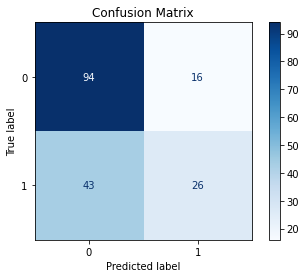

In [154]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [155]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
print(f"Recall Score: {recall_score(y_test, predicted_value):.3}")
print(f"Specitivity Score: {TN/(TN+FP):.3}")
print(f"Precision Score: {precision_score(y_test, predicted_value):.3}")
print(f"Negative Prediction Value: {TN/(TN+FN):.3}")
print(f"F1 Score: {f1_score(y_test, predicted_value):.3}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, predicted_value):.3}")

Recall Score: 0.377
Specitivity Score: 0.377
Precision Score: 0.619
Negative Prediction Value: 0.619
F1 Score: 0.468
Matthews Correlation Coefficient: 0.266


Area under the curve:  0.6156785243741765


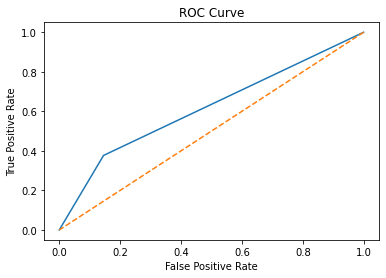

In [156]:
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, predicted_value)
area = auc(fpr, tpr)
print("Area under the curve: ", area)
plt.plot(fpr, tpr)
plt.plot([1, 0], [1, 0], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
